In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pennylane import numpy as pnp

In [2]:
num_qubits = 3
shots = 2
num_energy_samples = 2500

dev = qml.device("default.qubit", wires=num_qubits, shots=shots, seed=42)

H = np.array([[2.375     , 2.47487373, 1.76776695, 0.8660254 , 0.        ,
        0.        , 0.        , 0.        ],
       [2.47487373, 5.875     , 5.        , 3.06186218, 0.        ,
        0.        , 0.        , 0.        ],
       [1.76776695, 5.        , 9.375     , 5.51135192, 0.        ,
        0.        , 0.        , 0.        ],
       [0.8660254 , 3.06186218, 5.51135192, 5.875     , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.375     ,
        1.06066017, 1.76776695, 0.8660254 ],
       [0.        , 0.        , 0.        , 0.        , 1.06066017,
        4.875     , 3.        , 3.06186218],
       [0.        , 0.        , 0.        , 0.        , 1.76776695,
        3.        , 8.375     , 3.06186218],
       [0.        , 0.        , 0.        , 0.        , 0.8660254 ,
        3.06186218, 3.06186218, 4.875     ]])

H_decomp = qml.pauli_decompose(H, wire_order=range(num_qubits))
paulis = H_decomp.ops
coeffs = H_decomp.coeffs

min_eigenvalue = np.sort(np.linalg.eig(H)[0])[0]

In [3]:
np.linalg.eig(H)[0]

array([17.16647568,  3.68722443,  0.95063354,  1.69566635, 12.87660419,
        3.88130778,  0.90655987,  1.83552815])

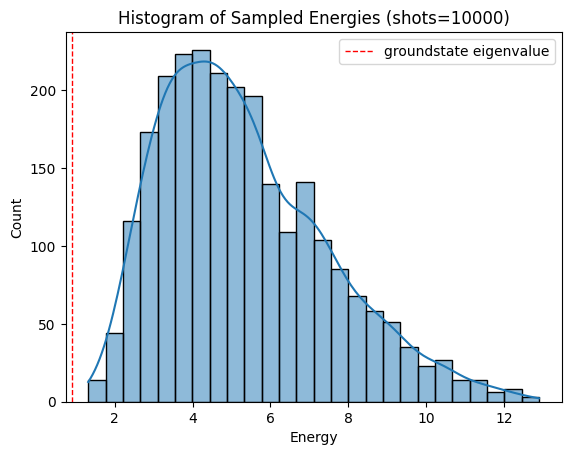

In [22]:
@qml.qnode(dev)
def circuit(params):

    num_layers=1
    params_shape = (num_layers, num_qubits, 3)
    params = pnp.tensor(params.reshape(params_shape), requires_grad=True)
    qml.StronglyEntanglingLayers(weights=params, wires=range(num_qubits))
    
    #param_index=0
    #for i in range(num_qubits):
        #qml.RY(params[param_index], wires=i)

        #qml.RX(params[param_index], wires=i)
        
    #    param_index += 1
        
    return qml.expval(qml.Hermitian(H, wires=range(num_qubits)))

energies = []
for i in range(num_energy_samples):

    params = np.random.rand(3*num_qubits)*2*np.pi
    e = circuit(params)
    energies.append(e)


plt.figure()
sns.histplot(energies, kde=True)
plt.axvline(x=min_eigenvalue, color='red', linestyle='--', linewidth=1.0, label='groundstate eigenvalue')
plt.xlabel("Energy")
plt.title(f"Histogram of Sampled Energies (shots={shots})")
plt.legend()
plt.show()



In [23]:
min_eigenvalue

np.float64(0.906559872616798)

In [24]:
np.sort(energies)

array([ 1.32320329,  1.35675176,  1.39349764, ..., 12.71436293,
       12.83571834, 12.89213652])

c:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\.venv\Lib\site-packages\pennylane\ops\op_math\composite.py:209: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self._math_op(math.vstack(eigvals), axis=0)


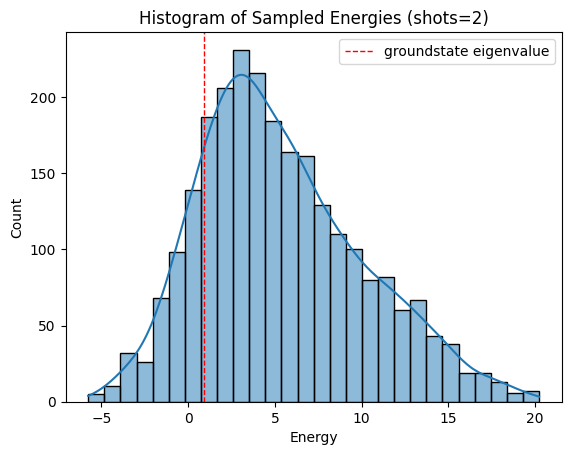

In [49]:
@qml.qnode(dev)
def circuit(params):
    param_index = 0
    for i in range(num_qubits):
        qml.RY(params[param_index], wires=i)
        param_index += 1

    return [qml.sample(op) for op in paulis]


energies = []
for i in range(num_energy_samples):
 
    params = np.random.rand(num_qubits) * 2 * np.pi
    samples = circuit(params)  
    samples = np.array(samples).T 
    expectation_val = np.mean(samples @ coeffs)

    energies.append(expectation_val)


plt.figure()
sns.histplot(energies, kde=True)
plt.axvline(x=min_eigenvalue, color='red', linestyle='--', linewidth=1.0, label='groundstate eigenvalue')
plt.legend()
plt.xlabel("Energy")
plt.title(f"Histogram of Sampled Energies (shots={shots})")
plt.show()



In [59]:
params = np.random.rand(num_qubits) * 2 * np.pi
@qml.qnode(dev)
def circuit(params):
    
    param_index=0
    for i in range(num_qubits):
        qml.RY(params[param_index], wires=i)
        param_index += 1
        
    return qml.expval(qml.Hermitian(H, wires=range(num_qubits)))

circuit(params)

np.float64(8.250795906150952)

In [60]:
@qml.qnode(dev)
def circuit(params):
    param_index = 0
    for i in range(num_qubits):
        qml.RY(params[param_index], wires=i)
        param_index += 1

    return [qml.sample(op) for op in paulis]


samples = circuit(params)  
samples = np.array(samples).T 
np.mean(samples @ coeffs)

np.float64(8.317276070931001)

In [52]:
qml.about()

Name: PennyLane
Version: 0.40.0
Summary: PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.
Home-page: https://github.com/PennyLaneAI/pennylane
Author: 
Author-email: 
License: Apache License 2.0
Location: c:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\.venv\Lib\site-packages
Requires: appdirs, autograd, autoray, cachetools, diastatic-malt, networkx, numpy, packaging, pennylane-lightning, requests, rustworkx, scipy, tomlkit, typing-extensions
Required-by: PennyLane-qiskit, PennyLane_Lightning

Platform info:           Windows-11-10.0.26100-SP0
Python version:          3.13.1
Numpy version:           2.0.2
Scipy version:           1.15.1
Installed devices:
- default.clifford (PennyLane-0.40.0)
- default.gaussian (PennyLane-0.40.0)
- default.mixed (PennyLane-0.40.0)
- default.qubit (PennyLane-0.40.0)
- default.qutrit (PennyLane-0.40.0)
- defa